# Models Training

This notebook contains :

1- **Two ML Models**

2- **Two DL Models with different features**

3- **Different Accuracy Metrics**

4-**Comparison betweent the models**


<hr style="border:2px solid black"> </hr>

In [159]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.metrics import f1_score ,recall_score ,precision_score ,confusion_matrix,accuracy_score

from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense , Activation ,Dropout,Conv1D
import pickle
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder

# ML Part

In this **discrete** NLP Problem, It's preferable to use Probabilistic Model

In [2]:
y = pd.read_csv('dialects.csv')

In [3]:
X = pd.read_csv('features.csv')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # split df into 80-20 sets

In [5]:
del X

**Logisitic regressing Model**

In [6]:
L_R = SGDClassifier(loss ='log',max_iter= 5000)
L_R.fit(X_train,y_train)

C:\Users\RC\.conda\envs\Digisay\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(loss='log', max_iter=5000)

**Naive Bayes Model**

In [7]:
NB = MultinomialNB()
NB.fit(X_train,y_train)

C:\Users\RC\.conda\envs\Digisay\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [8]:
def Meaure_accuracy(y_test, predictions):
    accuracy = round(accuracy_score(y_test, predictions )*100,4) 
    precision = round(precision_score(y_test, predictions ,average='macro')*100,4) 
    recall  = round(recall_score(y_test, predictions ,average='macro')*100,4) 
    f1  = round(f1_score(y_test, predictions ,average='macro')*100,4)
    C_M = confusion_matrix(y_test, predictions)
    plt.rc('figure', figsize=[10,10])
    plt.matshow(C_M,cmap="Blues")
    s ='accuracy:' +str(accuracy)+', precision:' +str(precision),  ', recall:' +str(recall)+', f1 Score: ' +str(f1)  
    plt.title( s )
    for i in range(0,C_M.shape[0]):
        for j in range(0,C_M.shape[1]):
            plt.annotate(C_M[i,j],(j,i))

 


In [9]:
L_R_predictions =L_R.predict(X_test)

In [10]:
NB_predictions =NB.predict(X_test)

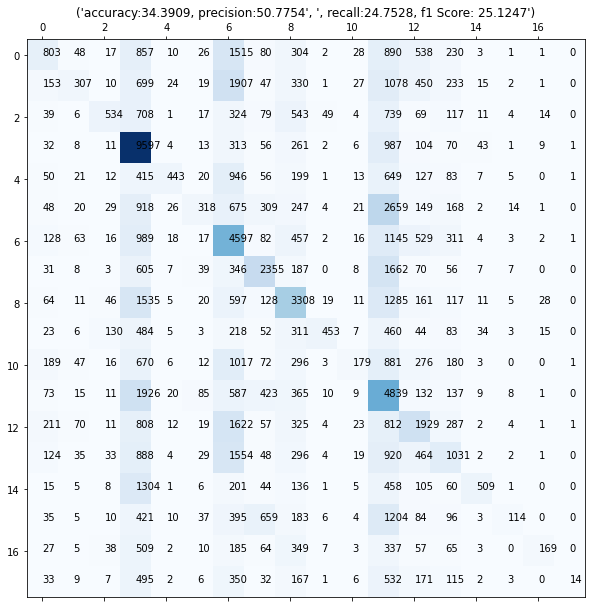

In [11]:
Meaure_accuracy(y_test, L_R_predictions )

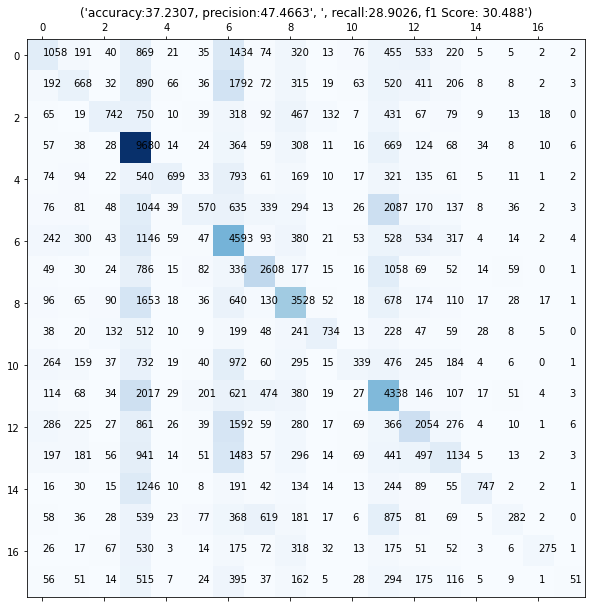

In [12]:
Meaure_accuracy(y_test, NB_predictions)

In [13]:
with open('NB.pkl','wb') as f:
    pickle.dump(NB,f)

Analysing the Confusion Matrix, one can see that classifier is biased to some classes like  3 and 6 

On my opinion, this happened due two reasons

1-imbalnced classes 

2- too many words is common between these classes 

"May be the data is not collected accurately"


We can Solve this by:

1- Extracting more feature manually from each class equally can help 

For example: top 200 frequent words for each class could be extracted (total 200 * 18 features) 

2- Oversampling 
    

# DL Part

**First Approach** in which I feed the DL model with TFIDF Features

In [21]:
model = Sequential()
model.add(Dense(1024, input_shape=(2000,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(18))
model.add(Activation('sigmoid'))


In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1024)              2049024   
_________________________________________________________________
activation_2 (Activation)    (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 18)                18450     
_________________________________________________________________
activation_3 (Activation)    (None, 18)                0         
Total params: 2,067,474
Trainable params: 2,067,474
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['categorical_accuracy'])


In [24]:
model.fit(X_train,keras.utils.to_categorical(y_train,18), batch_size=100,
                    epochs=10,
                    verbose=1,
                    validation_split=0.1,
                    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=0.0001),
                    EarlyStopping(monitor='val_categorical_accuracy', mode='max', patience=5, verbose=1,restore_best_weights=True)])

Epoch 1/10
3298/3298 [==============================] - 55s 16ms/step - loss: 2.0588 - categorical_accuracy: 0.3521 - val_loss: 1.9635 - val_categorical_accuracy: 0.3795
Epoch 2/10
3298/3298 [==============================] - 49s 15ms/step - loss: 1.9245 - categorical_accuracy: 0.3863 - val_loss: 1.9455 - val_categorical_accuracy: 0.3835
Epoch 3/10
3298/3298 [==============================] - 49s 15ms/step - loss: 1.8751 - categorical_accuracy: 0.3996 - val_loss: 1.9374 - val_categorical_accuracy: 0.3870
Epoch 4/10
3298/3298 [==============================] - 49s 15ms/step - loss: 1.8288 - categorical_accuracy: 0.4129 - val_loss: 1.9373 - val_categorical_accuracy: 0.3881
Epoch 5/10
3298/3298 [==============================] - 48s 15ms/step - loss: 1.7825 - categorical_accuracy: 0.4281 - val_loss: 1.9382 - val_categorical_accuracy: 0.3882
Epoch 6/10
3298/3298 [==============================] - 49s 15ms/step - loss: 1.7337 - categorical_accuracy: 0.4433 - val_loss: 1.9452 - val_categoric

In [25]:
DL_Predictions = model.predict(X_test,verbose=1)


2863/2863 [==============================] - 11s 4ms/step


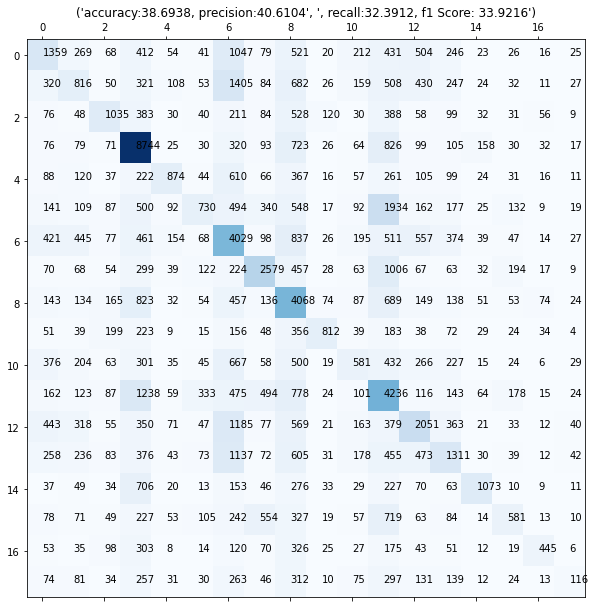

In [26]:
Meaure_accuracy(y_test, np.argmax(DL_Predictions, axis=1))

In [27]:
del X_train, X_test, y_train, y_test

This model has an advantage over the ML models because it deals better with non Linearity and little unbiased 

**2nd approach**. In which, I let the model itself learning from the text of tweets not the extracted features

In [152]:
X = pd.read_csv('clean_tweet_untokenized.csv')

In [153]:
tweets = X["clean_tweet_untokenized"].values
dialects = y[["dialect_encoded"]].values


In [154]:
X_train, X_test, y_train , y_test = train_test_split(tweets,dialects, test_size = 0.20, random_state = 42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(366364,) (91591,)
(366364, 1) (91591, 1)


Text(0.5, 1.0, 'Distibution of words lengths')

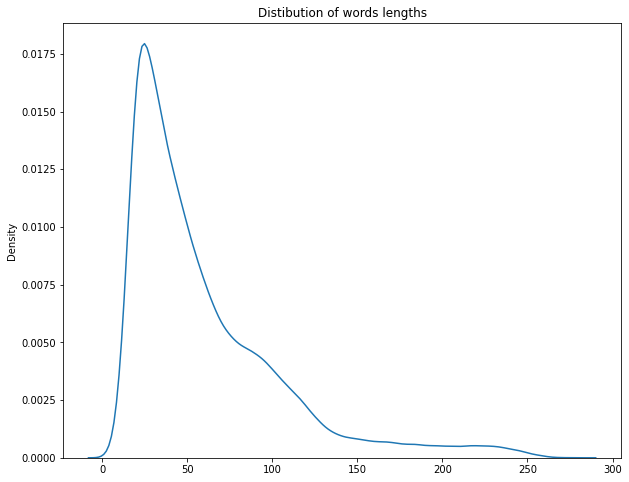

In [155]:
import seaborn as sns
dist =X ['clean_tweet_untokenized'].str.len().values
plt.figure(figsize=(10,8))
sns.kdeplot(dist)
plt.title('Distibution of words lengths')

In [156]:
# Total words will be in the corpus
vocab_size = 405000


# Dimension of the dense embedding.
embedding_dim = 128

# Max number of words in each tweet.
max_length = 250

# Truncate and padding options
trunc_type = 'post'
padding_type = 'post'


Encode words then convert the whole tweet into int with fixed size

In [157]:
tokenizer = Tokenizer(num_words=vocab_size ,oov_token='<OOV>')
tokenizer.fit_on_texts(X_train.astype(str))
word_index = tokenizer.word_index
print('Found %s unique word.' % len(word_index))


train_seq = tokenizer.texts_to_sequences(X_train.astype(str))
train_padded = pad_sequences(train_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

validation_seq = tokenizer.texts_to_sequences(X_test.astype(str))
validation_padded = pad_sequences(validation_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print('Shape of train_padded:', train_padded.shape)
print('Shape of validation_padded:', validation_padded.shape)


Found 404709 unique word.
Shape of train_padded: (366364, 250)
Shape of validation_padded: (91591, 250)


In [160]:
encode = OneHotEncoder()

training_labels = encode.fit_transform(y_train)
validation_labels = encode.transform(y_test)

training_labels = training_labels.toarray()
validation_labels = validation_labels.toarray()


**Recurrent Neural Networks** usally deal better with sequential data

In [13]:
RNN_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(18,activation='softmax')
])


In [14]:
RNN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 128)          51840000  
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 18)                1170      
Total params: 51,948,242
Trainable params: 51,948,242
Non-trainable params: 0
_________________________________________________________________


In [15]:
RNN_model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['categorical_accuracy'])

epochs = 10
batch_size = 256

history = RNN_model.fit(train_padded, training_labels, shuffle=True ,
                    epochs=epochs, batch_size=batch_size, 
                    validation_split=0.2,
                       callbacks=[EarlyStopping(monitor='val_categorical_accuracy', mode='max', patience=1, verbose=1 ,  restore_best_weights=True,)])

Epoch 1/10
1145/1145 [==============================] - 3931s 3s/step - loss: 2.0015 - categorical_accuracy: 0.3621 - val_loss: 1.6949 - val_categorical_accuracy: 0.4675
Epoch 2/10
1145/1145 [==============================] - 3927s 3s/step - loss: 1.2308 - categorical_accuracy: 0.6136 - val_loss: 1.6728 - val_categorical_accuracy: 0.4929
Epoch 3/10
1145/1145 [==============================] - 3925s 3s/step - loss: 0.6919 - categorical_accuracy: 0.7910 - val_loss: 1.9078 - val_categorical_accuracy: 0.4786
Restoring model weights from the end of the best epoch.
Epoch 00003: early stopping


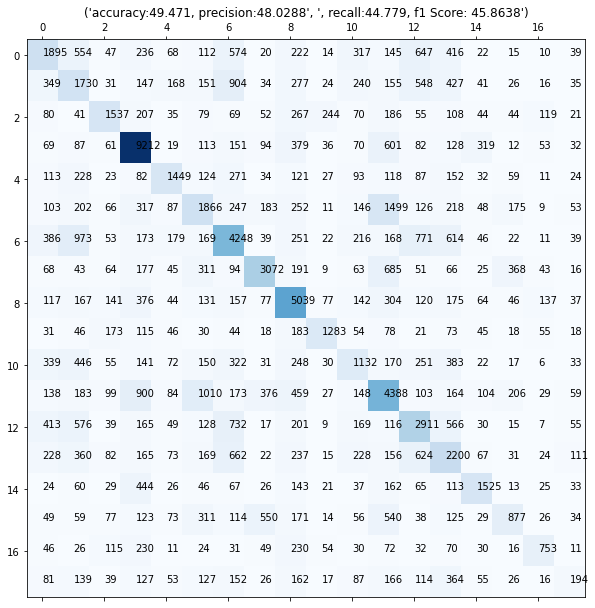

In [18]:
predicted = RNN_model.predict(validation_padded)
Meaure_accuracy(np.argmax(validation_labels, axis=1), np.argmax(predicted, axis=1))


In [166]:
print(classification_report(np.argmax(validation_labels, axis=1), np.argmax(predicted, axis=1)  ))

              precision    recall  f1-score   support

           0       0.42      0.35      0.38      5353
           1       0.29      0.33      0.31      5303
           2       0.56      0.47      0.51      3258
           3       0.69      0.80      0.74     11518
           4       0.56      0.48      0.51      3048
           5       0.37      0.33      0.35      5608
           6       0.47      0.51      0.49      8380
           7       0.65      0.57      0.61      5391
           8       0.56      0.69      0.62      7351
           9       0.66      0.55      0.60      2331
          10       0.34      0.29      0.32      3848
          11       0.45      0.51      0.48      8650
          12       0.44      0.47      0.45      6198
          13       0.35      0.40      0.37      5454
          14       0.60      0.53      0.56      2859
          15       0.44      0.27      0.33      3266
          16       0.56      0.41      0.47      1830
          17       0.23    

This Approach perfroms the best. 

This means that the RNN could extract more important features from the tweets than TFIDF could Extract. 

In [19]:
RNN_model.save('Best_RecurrentNeuralNetwork')

INFO:tensorflow:Assets written to: Best_RecurrentNeuralNetwork\assets


INFO:tensorflow:Assets written to: Best_RecurrentNeuralNetwork\assets


# Results Comparison & Conclusion

RNN could perform the best in terms of F1- Score and categorical accuracy that could achieve 12% higher in both

and confusion matrix show that RNN could preicit accurately much higher in class with low data than the other classifiers

